# Reproduced figures for  [Galukhin A, Bolmatenkov D, Emelianova A, Zharov I, Gor GY, "Porous Structure of Silica Colloidal Crystals", Langmuir 2019](https://doi.org/10.1021/acs.langmuir.8b03476)

In [1]:
%run __imports.ipynb
from CoolProp.CoolProp import PropsSI as props
import math

In [2]:
# BET limits
pressure_limit_min = 0.05
pressure_limit_max = 0.305
n2_csa = 0.162e-18  # eff cross-sectional area, m^2

Figure 3: Experimental isotherms

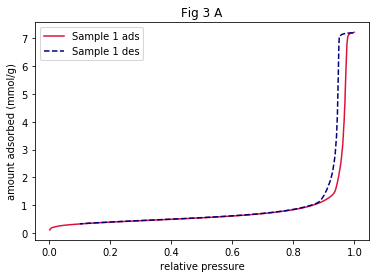

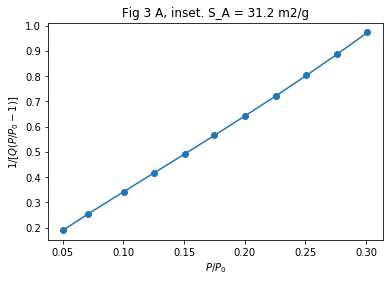

In [3]:
sample_id = 1
config = [
    dict(branch="ads", style=dict(ls="-", color="crimson")),
    dict(branch="des", style=dict(ls="--", color="navy")),
]

for c in config:
    data = np.genfromtxt(f"../data/maximov2019lang/sample{sample_id}-{c['branch']}.tsv", names=True)
    pressure = data["p_rel"]
    density = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
    plt.plot(pressure, density, label=f"Sample {sample_id} {c['branch']}", **c['style'])

plt.legend()
plt.xlabel("relative pressure")
plt.ylabel("amount adsorbed (mmol/g)")
plt.title("Fig 3 A")
plt.show()

# BET plot 
data = np.genfromtxt(f"../data/maximov2019lang/sample{sample_id}-ads.tsv", names=True)
pressure = data["p_rel"]
density = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
s_a = bet.surface_area(pressure, density, csa=n2_csa, pressure_limit_min=pressure_limit_min,
pressure_limit_max=pressure_limit_max)

p_filter = np.logical_and(pressure_limit_min <= pressure, pressure <= pressure_limit_max)
p = pressure[p_filter]
n = density[p_filter]
plt.plot(p, 1 / (n * (1 / p - 1)), "o-")
plt.xlabel("$P/P_0$")
plt.ylabel("$1/[Q (P/P_0 - 1)]$")
plt.title(f"Fig 3 A, inset. S_A = {s_a:.1f} m2/g")
plt.show()

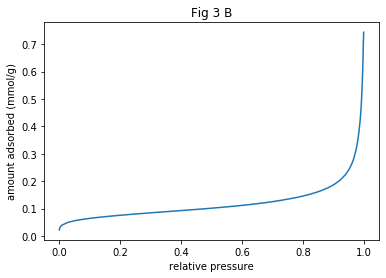

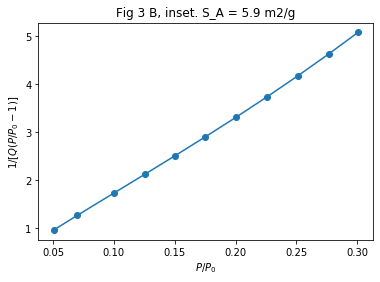

In [4]:
data = np.genfromtxt(f"../data/maximov2019lang/sampleR.tsv", names=True)
pressure = data["p_rel"]
density = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
plt.plot(pressure, density, "-", label=f"Sample R")
plt.xlabel("relative pressure")
plt.ylabel("amount adsorbed (mmol/g)")
plt.title("Fig 3 B")
plt.show()

# BET plot
s_a = bet.surface_area(pressure, density, csa=n2_csa, pressure_limit_min=pressure_limit_min,
                           pressure_limit_max=pressure_limit_max)

p_filter = np.logical_and(pressure_limit_min <= pressure, pressure <= pressure_limit_max)
p = pressure[p_filter]
n = density[p_filter]
plt.plot(p, 1 / (n * (1 / p - 1)), "o-")
plt.xlabel("$P/P_0$")
plt.ylabel("$1/[Q (P/P_0 - 1)]$")
plt.title(f"Fig 3 B, inset. S_A = {s_a:.1f} m2/g")
plt.show()

Figure 4

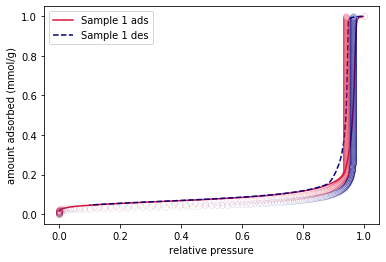

In [5]:
sample_id = 1
config = [
    dict(branch="ads", style=dict(ls="-", color="crimson")),
    dict(branch="des", style=dict(ls="--", color="navy")),
]

for c in config:
    data = np.genfromtxt(f"../data/maximov2019lang/sample{sample_id}-{c['branch']}.tsv", names=True)
    pressure = data["p_rel"]
    density = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
    plt.plot(pressure, density / np.max(density), label=f"Sample {sample_id} {c['branch']}", **c['style'])


# Single mode prediction 
data = np.genfromtxt(f"../data/maximov2019lang/sampleR.tsv", names=True)
pressure_ref = data["p_rel"]
density_ref = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
surface_area = bet.surface_area(pressure_ref, density_ref, csa=n2_csa, pressure_limit_min=pressure_limit_min,
                       pressure_limit_max=pressure_limit_max) * 1e3
model = dbdb.nitrogen(reference_s_a=surface_area)
fhh_k, fhh_m = model.fhh_fit(pressure_ref, density_ref)

# DBdB fits using the radii values provided in the article
p_fit, n_fit = model.isotherm(fhh_k, fhh_m, pore_size=2 * 35 * 1e-9, is_ads_branch=True)
plt.plot(p_fit, n_fit, "o", fillstyle='none', mew=0.1, alpha=0.7, color="navy")                         
p_fit, n_fit = model.isotherm(fhh_k, fhh_m, pore_size=2 * 27 * 1e-9, is_ads_branch=False)
plt.plot(p_fit, n_fit, "o", fillstyle='none', mew=0.1, alpha=0.7, color="crimson")

plt.legend()
plt.xlabel("relative pressure")
plt.ylabel("amount adsorbed (mmol/g)")
plt.show()

Prediction using single mode estimator (slightly different values)

In [6]:
pore_sizes = np.arange(2, 100 + 2, 2)  # nm
for is_ads_branch in [True, False]:
    branch = "ads" if is_ads_branch else "des"
    data = np.genfromtxt(f"../data/maximov2019lang/sample1-{branch}.tsv", names=True)
    data.sort(order="p_rel")
    pressure = data["p_rel"]
    density = data["Q_cm3_per_g_STP"] / (dbdb.V_m * 1e3)
    kernel = model.kernel(pressure, pore_sizes_nm=pore_sizes, fhh_k=fhh_k, fhh_m=fhh_m, is_ads_branch=is_ads_branch)
    psz_est = model.single_mode_pore_size(kernel, pore_sizes, pressure, density)
    print(f"R_{branch} = {psz_est * 0.5} nm")

R_ads = 38.0 nm
R_des = 30.0 nm
